# 零、数据引入、定义与模组加载

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mathmodeling/helloworld.py
/kaggle/input/mathmodeling/.idea/vcs.xml
/kaggle/input/mathmodeling/.idea/MathModeling.iml
/kaggle/input/mathmodeling/.idea/misc.xml
/kaggle/input/mathmodeling/.idea/.gitignore
/kaggle/input/mathmodeling/.idea/modules.xml
/kaggle/input/mathmodeling/.idea/inspectionProfiles/profiles_settings.xml
/kaggle/input/mathmodeling/.idea/inspectionProfiles/Project_Default.xml
/kaggle/input/mathmodeling/.idea/dictionaries/13592.xml
/kaggle/input/mathmodeling/resource/e3.xlsx
/kaggle/input/mathmodeling/resource/e1.xlsx
/kaggle/input/mathmodeling/resource/e2.xlsx


In [2]:
from sklearn.neighbors import KNeighborsClassifier  # knn
from sklearn.svm import SVC  # 支持向量机分类器
from sklearn.tree import DecisionTreeClassifier # 决策树分类器

import gensim
import sklearn

from sklearn import metrics  # 模型评价工具
import matplotlib.pyplot as plt  # 可视化

import seaborn as sns  # 热力图

加载附件一数据

In [3]:
data_path = "/kaggle/input/mathmodeling/resource/e1.xlsx"

data = pd.read_excel(data_path, sheet_name=["企业信息", "进项发票信息", "销项发票信息"])

In [4]:
data

{'企业信息':      企业代号                 企业名称 信誉评级 是否违约
 0      E1          ***电器销售有限公司    A    否
 1      E2          ***技术有限责任公司    A    否
 2      E3  ***电子(中国)有限公司***分公司    C    否
 3      E4          ***发展有限责任公司    C    否
 4      E5         ***供应链管理有限公司    B    否
 ..    ...                  ...  ...  ...
 118  E119                ***药房    D    是
 119  E120          ***陈列广告有限公司    D    是
 120  E121     ***药业连锁有限公司***药店    D    是
 121  E122          ***商贸有限责任公司    D    是
 122  E123         ***创科技有限责任公司    D    是
 
 [123 rows x 4 columns],
 '进项发票信息':         企业代号      发票号码       开票日期  销方单位代号       金额      税额     价税合计  发票状态
 0         E1   3390939 2017-07-18  A00297  -943.40  -56.60 -1000.00  有效发票
 1         E1   3390940 2017-07-18  A00297 -4780.24 -286.81 -5067.05  有效发票
 2         E1   3390941 2017-07-18  A00297   943.40   56.60  1000.00  有效发票
 3         E1   3390942 2017-07-18  A00297  4780.24  286.81  5067.05  有效发票
 4         E1   9902669 2017-08-07  A05061   326.21    9.79   336.00  有效发票
 

In [5]:
data["企业信息"]["企业代号"][2]

'E3'

# 一、预处理

In [6]:
y_label_map = {}

# for e_id in data["企业信息"]["企业代号"]:
#     print(e_id)

# for label in data["企业信息"]["信誉评级"]:
#     print(label)
    
y_labels = list(data["企业信息"]["信誉评级"])
# y_labels

In [7]:
x_dict = {}

elem_ids = list(data["进项发票信息"]["企业代号"])
money = list(data["进项发票信息"]["金额"])
tax = list(data["进项发票信息"]["税额"])

# 发票状态映射到整数
status_map = {"有效发票": 0, "作废发票": 1}
status = [status_map[s] for s in data["进项发票信息"]["发票状态"]]

for i in range(len(data["进项发票信息"])):
    if x_dict.get(elem_ids[i], None) is None:
        x_dict[elem_ids[i]] = []
    x_dict[elem_ids[i]].append((money[i], tax[i], status[i]))

# x_dict

# 二、特征选择

In [8]:
print(len(data["进项发票信息"]))
print("sum:", sum([len(cluster) for cluster in x_dict.values()]))

print("各个公司记录的发票数量")
for e_id, cluster in x_dict.items():
    print(e_id, len(cluster))


210947
sum: 210947
各个公司记录的发票数量
E1 3441
E2 32156
E3 4561
E4 558
E5 2169
E6 11337
E7 13097
E8 22536
E9 4293
E10 4097
E11 2836
E12 1796
E13 13469
E14 7077
E15 92
E16 290
E17 7568
E18 5765
E19 1524
E20 1130
E21 2312
E22 1610
E23 4951
E24 2047
E25 1410
E26 791
E27 2565
E28 169
E29 50
E30 754
E31 412
E32 2826
E33 1293
E34 2309
E35 669
E36 1636
E37 618
E38 991
E39 282
E40 3148
E41 2033
E42 47
E43 78
E44 1248
E45 600
E46 2544
E47 2905
E48 1235
E49 3615
E50 197
E51 453
E52 425
E53 630
E54 1644
E55 823
E56 1201
E57 130
E58 1352
E59 549
E60 538
E61 212
E62 530
E63 1573
E64 32
E65 587
E66 577
E67 647
E68 3
E69 1
E70 1829
E71 1259
E72 117
E73 606
E74 19
E75 552
E76 350
E77 54
E78 52
E79 154
E80 395
E81 211
E82 315
E83 2890
E84 54
E85 229
E86 138
E87 379
E88 214
E89 65
E90 139
E91 177
E92 213
E93 213
E94 4
E95 4
E96 11
E97 9
E98 51
E99 880
E100 58
E101 16
E102 730
E103 172
E104 1
E105 6
E106 36
E107 9
E108 218
E109 10
E110 3
E111 278
E112 106
E113 104
E114 76
E115 2
E116 10
E117 4
E118 29
E119 315
E

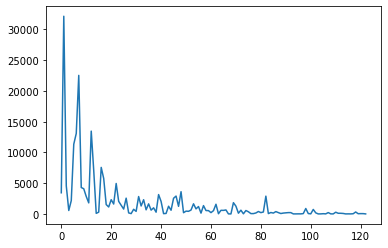

In [9]:
# 发票数量分布（所有类别）
plt.plot([len(cluster) for cluster in x_dict.values()])
plt.show()

# [len(cluster) for cluster in x_dict.values()]

In [10]:
# 按照信誉类别 发票数量分布制图
tags = ("A", "B", "C", "D")

# for tag_index in range(len(tags)):
#     A_cluster = [len(cluster) for index, cluster in enumerate(x_dict.values())
#                 if y_labels[index] == tags[tag_index]]
#     plt.plot(A_cluster)
#     plt.show()

In [11]:
def diff(data: list, mean):
    """计算一个数据序列的标准差"""
    if(len(data) is 0):
        return 0
    s = 0
    for num in data:
        s += (num - mean) ** 2
    return (s / len(data)) ** 0.5  # 开方得到标准差


def feature_select(cluster: list):
    """
    特征选取，选择“金额均值”，“税金均值”，“发票数量”特征
    input:: list of (money, tax, status)
    output:: (mean of money, mean of tax, num of records, 退款发票均值, 退款发票税款均值，退款发票数量，无效发票均值，无效发票税款均值，无效发票数量) 九元组
    """
    status = {"valid", "rollback", "invalid"}
    invalid_cluster = [record for record in cluster if record[2] == 1]  # 发票状态标记为1的是无效发票
    
    rollback_cluster = []
    valid_cluster = []
    # 下面识别有效发票与负值发票对
    for row in cluster:
        if row[0] < 0:  # 负值发票
            rollback_cluster.append(row)
        else:
            valid_cluster.append(row)  # 非负值的发票暂时视为有效发票
    for row in rollback_cluster:
        # 在正值发票中找出那些已退款的发票（与负值发票匹配）
        for r in valid_cluster:
            if abs(row[0]) == abs(r[0]) and abs(row[1]) == abs(r[1]):
                valid_cluster.remove(r)  # 在有效发票中删去这一条（因为它与负值发票匹配）
    
    res = []
    # 分别计算三种发票的三个指标，共计得到9个特征
    for c in (valid_cluster, invalid_cluster, rollback_cluster):
        num_of_records = len(c)
        # 如果某种发票的数量为零的话，三个指标直接返回0
        mean_of_money = (sum([record[0] for record in c]) / num_of_records) if num_of_records != 0 else 0
        mean_of_tax = (sum([record[1] for record in c]) / num_of_records) if num_of_records != 0 else 0
        # 将方差也作为特征
        diff_of_money = diff([record[0] for record in c], mean_of_money)
        diff_of_tax = diff([record[1] for record in c], mean_of_tax)
        
        res.append(num_of_records)
        res.append(mean_of_money)
        res.append(diff_of_money)
        res.append(mean_of_tax)
        res.append(diff_of_tax)
    
    # 计算异常发票在总发票数中的占比
    invalid_rate = res[0] / (res[0] + res[3] + res[6])
    # 将这个也作为特征
    res.append(invalid_rate)
    
    return tuple(res)


# 抽取特征
x_features = [feature_select(cluster) for cluster in x_dict.values()]

In [12]:
print("特征个数：", len(x_features[0]))
x_features[0]

特征个数： 16


(3296,
 1959500.2687712254,
 3744499.3174404493,
 305801.8462166261,
 595205.7614475138,
 192,
 1142297.5125000037,
 2855056.403611003,
 184534.85057291653,
 468323.33975562203,
 71,
 -6968981.582253528,
 3407241.4873331795,
 -1116621.3198591564,
 552486.1374371623,
 0.0022709181066380346)

In [13]:
# 销项发票数据处理
x_dict_output = {}  

elem_ids = list(data["销项发票信息"]["企业代号"])
money = list(data["销项发票信息"]["金额"])
tax = list(data["销项发票信息"]["税额"])

# 发票状态映射到整数
status_map = {"有效发票": 0, "作废发票": 1, " 作废发票": 1}
status = [status_map[s] for s in data["销项发票信息"]["发票状态"]]

for i in range(len(data["销项发票信息"])):
    if x_dict_output.get(elem_ids[i], None) is None:
        x_dict_output[elem_ids[i]] = []
    x_dict_output[elem_ids[i]].append((money[i], tax[i], status[i]))

# 抽取销项发票数据中的特征
x_features_output = [feature_select(cluster) for cluster in x_dict_output.values()]

print(len(x_features_output))
print(x_features_output[:3])

123
[(7811, 546593.1859198553, 384331.57514279446, 84992.12710792448, 61568.58393445092, 224, 389064.01745535707, 384322.0282644854, 58161.44700892857, 59552.5760694954, 229, -568021.3158951965, 369627.4526366388, -88192.83589519645, 58583.855781870116, 0.016209862174934433), (5919, 24629.36860280448, 26268.878016583923, 1478.3374083460008, 1580.6434164042698, 1042, 61938.716804222146, 37207.054301007825, 3716.3242514394983, 2232.424349318599, 360, -53043.422805555565, 38298.65158489626, -3180.913499999998, 2296.8314351344216, 0.08536684221824518), (16594, 45243.86086416726, 104815.11234349122, 7280.595065083755, 17241.420019911086, 385, 48334.977480519505, 143922.95010808643, 7949.462155844152, 23708.36761012913, 4501, -45492.515592090764, 89169.82845981004, -7461.137853810297, 14637.61114862519, 0.22980332683066662)]


In [14]:
# 展示特征选择之后的效果
print(len(x_features))  # 应为123，表示123家企业的信息
print(x_features[:3])  # 展示前3个企业的features

123
[(3296, 1959500.2687712254, 3744499.3174404493, 305801.8462166261, 595205.7614475138, 192, 1142297.5125000037, 2855056.403611003, 184534.85057291653, 468323.33975562203, 71, -6968981.582253528, 3407241.4873331795, -1116621.3198591564, 552486.1374371623, 0.0022709181066380346), (30477, 4240.457030219295, 23962.500312067863, 200.10816484560476, 1387.7729927228252, 721, 12180.1067267684, 47294.201776861926, 647.2292371705963, 2982.8162945932154, 156, -6380.947499999997, 18444.231821197074, -271.24865384615373, 844.4591779404161, 0.7111288047316281), (4416, 12484.663410326091, 54990.126411063364, 526.9473686594199, 2853.1262262354558, 194, 16308.482474226807, 46636.52488912117, 915.6711855670105, 2938.8742488144117, 26, -13045.104615384616, 61607.01942112487, -42.794230769230765, 56.74390073445895, 0.20779778267381976)]


In [15]:
# 将销项发票的features合并入进项发票的features中
for r_index in range(len(x_features)):
    x_features[r_index] += x_features_output[r_index]
    
x_features[:3]  # 展示前三个企业，每个企业包含9*2=18个Features

[(3296,
  1959500.2687712254,
  3744499.3174404493,
  305801.8462166261,
  595205.7614475138,
  192,
  1142297.5125000037,
  2855056.403611003,
  184534.85057291653,
  468323.33975562203,
  71,
  -6968981.582253528,
  3407241.4873331795,
  -1116621.3198591564,
  552486.1374371623,
  0.0022709181066380346,
  7811,
  546593.1859198553,
  384331.57514279446,
  84992.12710792448,
  61568.58393445092,
  224,
  389064.01745535707,
  384322.0282644854,
  58161.44700892857,
  59552.5760694954,
  229,
  -568021.3158951965,
  369627.4526366388,
  -88192.83589519645,
  58583.855781870116,
  0.016209862174934433),
 (30477,
  4240.457030219295,
  23962.500312067863,
  200.10816484560476,
  1387.7729927228252,
  721,
  12180.1067267684,
  47294.201776861926,
  647.2292371705963,
  2982.8162945932154,
  156,
  -6380.947499999997,
  18444.231821197074,
  -271.24865384615373,
  844.4591779404161,
  0.7111288047316281,
  5919,
  24629.36860280448,
  26268.878016583923,
  1478.3374083460008,
  1580.64341

# 计算每个类别的信贷风险（以有效发票率计）

In [16]:
print(len(x_features))
print(len(y_labels))

A_features = [features for e_id, features in enumerate(x_features) if y_labels[e_id] == "A"]

B_features = [features for e_id, features in enumerate(x_features) if y_labels[e_id] == "B"]

C_features = [features for e_id, features in enumerate(x_features) if y_labels[e_id] == "C"]

D_features = [features for e_id, features in enumerate(x_features) if y_labels[e_id] == "D"]

print(len(A_features) + len(B_features) + len(C_features) + len(D_features))  # 应该为123

123
123
123


In [17]:
risk_A = 1 - sum([(f[9]+f[19])/2 for f in A_features]) / len(A_features)
risk_B = 1 - sum([(f[9]+f[19])/2 for f in B_features]) / len(B_features)
risk_C = 1 - sum([(f[9]+f[19])/2 for f in C_features]) / len(C_features)
risk_D = 1 - sum([(f[9]+f[19])/2 for f in D_features]) / len(D_features)

print(risk_A, risk_B, risk_C, risk_D)

-16278.994854398894 -6764.385873647993 -15360.251053233498 -2029.1758366596794


# 特征优化
目前共20个特征

f0-f8: 三种类型进项发票（数量，金额均值，税款均值）

f9: （进项中）有效发票占比

f10-f18: 三种类型销项发票（数量，金额均值，税款均值）

f19: （销项中）有效发票占比

现需要从这些特征中挑选子集，或组合为更优的特征

In [18]:
print("记录条数：", len(x_features))
print("每条记录的特征个数：", len(x_features[0]))

记录条数： 123
每条记录的特征个数： 32


尝试：挑选”有效发票数量“，”有效发票平均金额“，”信贷风险（1 - f9与f19的平均值）“三个特征

In [19]:
# x_features = [(f[0], f[1], 1-(f[9]+f[19])/2) for f in x_features]

尝试二：挑选”有效发票数量“，”有效发票平均金额“，“进项发票有效率”，“销项发票有效率”四个特征

In [20]:
# x_features = [(f[0], f[1], f[9], f[19]) for f in x_features]
# x_features

尝试三

In [21]:
# x_features = [(f[10], f[19]) for f in x_features]

# 特征值归一化
归一化的意义：三个特征的值在数值上处于不同数量级，归一化可以将三个特征映射到（0，1）的空间，得到数量级一致的特则

归一化（标准化）的三种方法：最小-最大标准化、零-均值标准化（z-score）、小数定标规范化

这里使用第二种

In [22]:
def transformMatrix(m):
    """矩阵转置"""
    rt = [[] for i in m[0]]    # m[0] 有几个元素，说明原矩阵有多少列。此处创建转置矩阵的行
    for ele in m:
        for i in range(len(ele)):
            rt[i].append(ele[i])
    return rt


def z_score_std(cluster: list):
    """归一化方法，使用z-score归一化公式
    input:: list of (feature_1, f_2, f_3, ..., fn) n元组
    output:: list of (converted_f1, c_f2, c_f3, ..., c_fn) 值归一化后的n元组
    """
    # test
    # print(cluster)

    cols = []
    for f_id in range(len(cluster[0])):
        lt = [t[f_id] for t in cluster]
        mean = sum(lt) / len(cluster)  # 计算均值
        d = diff(lt, mean)  # 标准差
        converted_lt = [(elem - mean) / d for elem in lt]
        cols.append(converted_lt)
        
    # 矩阵转置
    res = transformMatrix(cols)
    return res

In [23]:
# x_features
x_std = z_score_std(x_features)  # 包含了进项发票和销项发票的features

# x_std = x_features  # 假如不做归一化

# x_std

# 10折交叉验证

In [24]:
y_labels = list(data["企业信息"]["信誉评级"])
y_map = {"A":0, "B":1, "C":2, "D":3}
targets = [y_map[elem] for elem in y_labels]

In [25]:
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier

In [26]:
num_of_its = 10  # 迭代次数

# 随机森林模型参数
max_features = "log2"
max_depth = 7
# min_samples_leaf = 
n_estimators = 1
min_samples_leaf=5

# 决策树参数
splitter="best"

rf_heat_map_data = np.zeros(32)  # 初始化热力图矩阵
dt_heat_map_data = np.zeros(32)
rf_acc_logs = []  
dt_acc_logs = []

# 交叉检验迭代
for i in tqdm(range(num_of_its)):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_std, targets, test_size=0.3)
    
    # 初始化模型
    rf = RandomForestClassifier(max_features=max_features,
                               max_depth=max_depth,
                               n_estimators=n_estimators,
                               min_samples_leaf=min_samples_leaf)
    
    dt = DecisionTreeClassifier(splitter=splitter)
    
    # 拟合模型
    rf.fit(x_train, y_train)
    dt.fit(x_train, y_train)
    
#     print(f"{i}/{num_of_its}")
#     print("random forest")
#     print("测试集上精度：", metrics.accuracy_score(y_test, rf.predict(x_test)))
#     print("训练集上精度：", metrics.accuracy_score(y_train, rf.predict(x_train)))
    rf_acc_logs.append(metrics.accuracy_score(y_test, rf.predict(x_test)))
    rf_heat_map_data += rf.feature_importances_
    
#     print("decision tree")
#     print("测试集上精度：", metrics.accuracy_score(y_test, dt.predict(x_test)))
#     print("训练集上精度：", metrics.accuracy_score(y_train, dt.predict(x_train)))
    dt_acc_logs.append(metrics.accuracy_score(y_test, dt.predict(x_test)))
    dt_heat_map_data += dt.feature_importances_

rf_heat_map_data /= num_of_its
dt_heat_map_data /= num_of_its

100%|██████████| 10/10 [00:00<00:00, 124.93it/s]


平均精度 0.2864864864864865
[0.0827855  0.03970368 0.02799985 0.0108097  0.03236796 0.03363996
 0.02325561 0.02726046 0.0349234  0.06569447 0.         0.04349645
 0.01454121 0.02655244 0.01152839 0.001869   0.02554265 0.02119298
 0.05659896 0.02766476 0.02261733 0.14470794 0.04121508 0.03528015
 0.00716129 0.02668909 0.0441312  0.01843144 0.01160448 0.02421129
 0.         0.01652326]


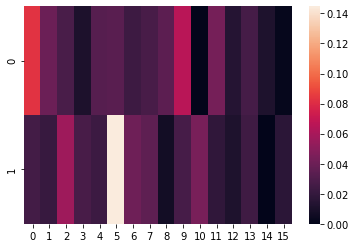

In [27]:
# 随机森林
avg_acc = sum(rf_acc_logs) / len(rf_acc_logs)
print("平均精度", avg_acc)
print(rf_heat_map_data)
sns.heatmap(rf_heat_map_data.reshape(2, 16))

平均精度 0.4027027027027027
[0.03142267 0.00891874 0.01270405 0.02139628 0.03180893 0.00855459
 0.01769791 0.00765368 0.0172663  0.04190406 0.0160811  0.00513681
 0.0199347  0.03728575 0.01752819 0.02383801 0.21798476 0.06537969
 0.0331892  0.02721462 0.01284905 0.06966739 0.02793894 0.04406612
 0.00584379 0.02031149 0.03335036 0.00917989 0.02747899 0.0140225
 0.04287908 0.02951236]


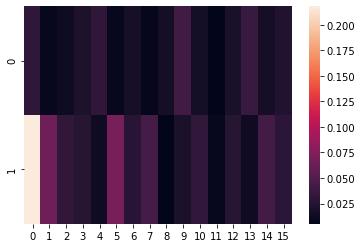

In [28]:
# 决策树
avg_acc = sum(dt_acc_logs) / len(dt_acc_logs)
print("平均精度", avg_acc)
print(dt_heat_map_data)
sns.heatmap(dt_heat_map_data.reshape(2, 16))

# 使用贝叶斯优化器

In [29]:
from bayes_opt import BayesianOptimization  # 贝叶斯优化器

In [30]:
ot_log = []

In [31]:
def evaluate(**bo_params):
    # 贝叶斯优化器生成的超参数
    max_features = int(bo_params['max_features'])
    max_depth = int(bo_params["max_depth"])
#     n_estimators = int(bo_params["n_estimators"])
    min_samples_leaf = int(bo_params["min_samples_leaf"])
    min_impurity_decrease = int(bo_params["min_impurity_decrease"])

    rf_heat_map_data = np.zeros(32)  # 初始化热力图矩阵
    dt_heat_map_data = np.zeros(32)
    rf_acc_logs = []  
    dt_acc_logs = []
    
    # 交叉检验迭代
    for i in range(num_of_its):
        x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_std, targets, test_size=0.3)

        # 初始化模型
#         rf = RandomForestClassifier(max_features=max_features,
#                                    max_depth=max_depth,
#                                    n_estimators=n_estimators,
#                                    min_samples_leaf=min_samples_leaf,
#                                    min_impurity_decrease=min_impurity_decrease)

        dt = DecisionTreeClassifier(splitter="best",
                                    max_features=max_features,
                                   max_depth=max_depth,
                                   min_samples_leaf=min_samples_leaf,
                                   min_impurity_decrease=min_impurity_decrease)

        # 拟合模型
#         rf.fit(x_train, y_train)
        dt.fit(x_train, y_train)
        
#         rf_acc_logs.append(metrics.accuracy_score(y_test, rf.predict(x_test)))
#         rf_heat_map_data += rf.feature_importances_

        dt_acc_logs.append(metrics.accuracy_score(y_test, dt.predict(x_test)))
        dt_heat_map_data += dt.feature_importances_
    
#     ot = sum(rf_acc_logs) / len(rf_acc_logs)  # 优化目标
    ot = sum(dt_acc_logs) / len(dt_acc_logs)  # 优化目标
    ot_log.append(ot)
    return ot

In [32]:
def bayesian_search(clf, params):
    """贝叶斯搜索器"""
    num_iter = 100  # 迭代次数
    init_points = 5
    
    # 创建一个贝叶斯优化对象，输入为自定义的模型评估函数与超参数的范围
    bayes = BayesianOptimization(clf, params)
    # 开始优化
    bayes.maximize(init_points=init_points, n_iter=num_iter)
    # 输出结果
    params = sorted([test for test in bayes.res], key=lambda x: x['target'])[0]['params']
    print(params)

    return params

In [33]:
params = {"max_features": (3, 32),
              "max_depth": (3, 100),
#               "n_estimators": (1, 100),
              "min_samples_leaf": (1, 100), "min_impurity_decrease": (1, 100)}
# 启动优化器
bayesian_search(evaluate, params)

|   iter    |  target   | max_depth | max_fe... | min_im... | min_sa... |
-------------------------------------------------------------------------
|  1        |  0.2541   |  60.62    |  29.09    |  73.21    |  19.14    |
|  2        |  0.2568   |  80.24    |  19.11    |  78.7     |  82.21    |
|  3        |  0.2622   |  77.03    |  17.86    |  8.922    |  87.38    |
|  4        |  0.2784   |  62.69    |  28.75    |  48.04    |  12.32    |
|  5        |  0.2784   |  23.05    |  25.18    |  2.944    |  5.932    |
|  6        |  0.2946   |  62.74    |  28.58    |  47.42    |  13.65    |
|  7        |  0.2919   |  61.54    |  30.16    |  46.16    |  13.24    |
|  8        |  0.2622   |  63.51    |  27.8     |  43.21    |  16.07    |
|  9        |  0.2838   |  66.12    |  28.53    |  46.41    |  15.68    |
|  10       |  0.2784   |  68.81    |  27.7     |  45.58    |  13.77    |
|  11       |  0.2919   |  58.27    |  30.54    |  43.8     |  16.75    |
|  12       |  0.2568   |  61.8     | 

{'max_depth': 62.70739568952297,
 'max_features': 5.150760210282285,
 'min_impurity_decrease': 58.67489821583044,
 'min_samples_leaf': 50.47895945277461}

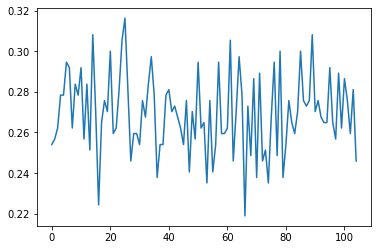

In [34]:
# 优化曲线
plt.plot(ot_log)
plt.show()

# 模型训练(knn)与精度评价

In [35]:
# 映射预测id与labels
y_map = {"A": 0, "B": 1, "C": 2, "D": 3}
targets = [y_map[elem] for elem in y_labels]

# 3/7开划分测试集与训练集
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_std, targets, test_size=0.3)

In [36]:
# targets

In [37]:
x_train[:10]  # 展示训练集中的10个数据

[[-0.4228625234552949,
  -0.2061845994344567,
  -0.2286172802071636,
  -0.1754331591735305,
  -0.19198671105565096,
  -0.46661390015562504,
  -0.2176311961377963,
  -0.21913809512573648,
  -0.18310292605504394,
  -0.18565248982309873,
  -0.32907001256342405,
  0.12454234461324044,
  -0.1571330476106764,
  0.1162532715079615,
  -0.14314191212929187,
  -0.6652159720438953,
  -0.4389039413947758,
  -0.5084684508027149,
  -0.5919377896821351,
  -0.42114898199861406,
  -0.556801967768403,
  -0.40684869886019254,
  -0.47375133837697764,
  -0.5749594338080113,
  -0.409241032011906,
  -0.5525251611289784,
  -0.13823632599991456,
  0.3656508359024938,
  -0.43692373334037593,
  0.32210449035712796,
  -0.38597784150481673,
  -0.2768865471258468],
 [3.0250276189425604,
  -0.18544859022091753,
  -0.16434496346269298,
  -0.16302868262799025,
  -0.14248546702533488,
  1.1477671566130871,
  -0.12289952676330168,
  -0.06956734820429733,
  -0.10503574996821959,
  -0.07258099721854974,
  0.53165537914951

In [38]:
y_train[:10]

[2, 0, 0, 1, 2, 0, 2, 0, 3, 3]

In [39]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

In [40]:
predicted = model.predict(x_test)
acc = metrics.accuracy_score(y_test, predicted)
print("测试集上精度：", acc)

print("训练集上精度：", metrics.accuracy_score(y_train, model.predict(x_train)))

测试集上精度： 0.32432432432432434
训练集上精度： 0.5697674418604651


# 朴素贝叶斯分类器
这里无法使用nb分类器，因为向量空间包含负值

# SVC

In [41]:
svc_model = SVC(kernel='linear')
svc_model.fit(x_train, y_train)

predicted = svc_model.predict(x_test)  # 使用SVM预测

# 模型评价
accuracy = metrics.accuracy_score(y_test, predicted)

print("测试集上精度：", accuracy)
print("训练集上精度：", metrics.accuracy_score(y_train, svc_model.predict(x_train)))

测试集上精度： 0.2972972972972973
训练集上精度： 0.6627906976744186


# 决策树分类器

In [42]:
print("特征数量：", len(x_train[0]))
x_train[0]

特征数量： 32


[-0.4228625234552949,
 -0.2061845994344567,
 -0.2286172802071636,
 -0.1754331591735305,
 -0.19198671105565096,
 -0.46661390015562504,
 -0.2176311961377963,
 -0.21913809512573648,
 -0.18310292605504394,
 -0.18565248982309873,
 -0.32907001256342405,
 0.12454234461324044,
 -0.1571330476106764,
 0.1162532715079615,
 -0.14314191212929187,
 -0.6652159720438953,
 -0.4389039413947758,
 -0.5084684508027149,
 -0.5919377896821351,
 -0.42114898199861406,
 -0.556801967768403,
 -0.40684869886019254,
 -0.47375133837697764,
 -0.5749594338080113,
 -0.409241032011906,
 -0.5525251611289784,
 -0.13823632599991456,
 0.3656508359024938,
 -0.43692373334037593,
 0.32210449035712796,
 -0.38597784150481673,
 -0.2768865471258468]

In [43]:
max_depth = 7  # 最大树深

# 实例化决策树模型
dt_model = DecisionTreeClassifier(max_depth=max_depth, random_state = 0, splitter="best")
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=0)

In [44]:
predicted = dt_model.predict(x_test)  # 使用SVM预测

# 模型评价
accuracy = metrics.accuracy_score(y_test, predicted)

print("测试集上精度：", accuracy)
print("训练集上精度：", metrics.accuracy_score(y_train, dt_model.predict(x_train)))

测试集上精度： 0.4864864864864865
训练集上精度： 0.9069767441860465


In [45]:
# 特征重要性分析
dt_model.feature_importances_

array([0.1118418 , 0.09912069, 0.06472141, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.04457852,
       0.02971902, 0.0264169 , 0.        , 0.        , 0.        ,
       0.        , 0.32077803, 0.12374059, 0.        , 0.        ,
       0.        , 0.07598306, 0.03546858, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.06763141, 0.        ])

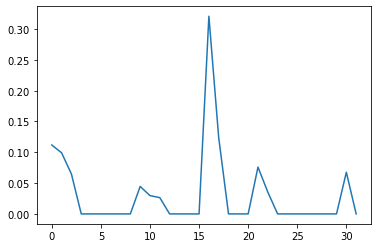

In [46]:
plt.plot(dt_model.feature_importances_)
plt.show()

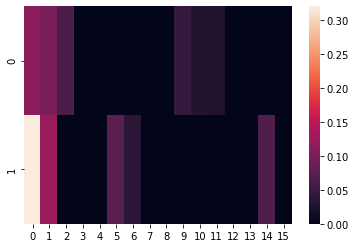

In [47]:
# 绘制热力图
sns.heatmap(dt_model.feature_importances_.reshape(2, 16))

# 使用随机森林

In [48]:
# 模型参数
max_features = "log2"
max_depth = 7
# min_samples_leaf = 
n_estimators = 1

rf = RandomForestClassifier(max_features=max_features,
                           max_depth=max_depth,
                           n_estimators=n_estimators)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)

print("测试集上精度：", metrics.accuracy_score(y_test, predicted))
print("训练集上精度：", metrics.accuracy_score(y_train, rf.predict(x_train)))

测试集上精度： 0.4864864864864865
训练集上精度： 0.7325581395348837


In [49]:
# 特征重要性分析
rf.feature_importances_

array([0.        , 0.10647345, 0.02646833, 0.09540342, 0.        ,
       0.        , 0.        , 0.        , 0.1510566 , 0.        ,
       0.08964707, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.21556743, 0.        , 0.        , 0.0518338 ,
       0.03308541, 0.08640512, 0.        , 0.        , 0.0034464 ,
       0.0964991 , 0.        , 0.        , 0.04411388, 0.        ,
       0.        , 0.        ])

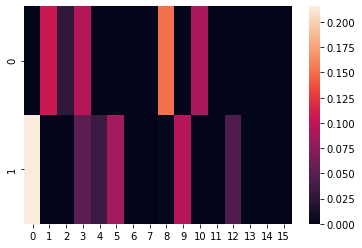

In [50]:
# 绘制热力图
sns.heatmap(rf.feature_importances_.reshape(2, 16))
# plt.yticks(np.array(["f0~f4", "f5~f9", "f10~f14", "f15~f19"]))
# plt.show()

# 使用梯度提升树

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [52]:
gbrt=GradientBoostingClassifier(learning_rate=0.05)

In [53]:
gbrt.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.05)

In [54]:
print("测试集上精度", gbrt.score(x_test,y_test))
print("训练集上精度", gbrt.score(x_train,y_train))

测试集上精度 0.4864864864864865
训练集上精度 1.0


# 使用AdaBoost

In [55]:
from sklearn.ensemble import AdaBoostClassifier

In [56]:
ada = AdaBoostClassifier()

In [57]:
ada.fit(x_train, y_train)

AdaBoostClassifier()

In [58]:
print("测试集上精度", ada.score(x_test,y_test))
print("训练集上精度", ada.score(x_train,y_train))

测试集上精度 0.4864864864864865
训练集上精度 0.7790697674418605


In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
print("测试集上精度", gb.score(x_test,y_test))
print("训练集上精度", gb.score(x_train,y_train))

测试集上精度 0.4864864864864865
训练集上精度 1.0


In [60]:
gb.feature_importances_

array([0.03229662, 0.0448202 , 0.01420625, 0.01174785, 0.01719537,
       0.01204639, 0.03474535, 0.00345261, 0.00303059, 0.05123635,
       0.00111023, 0.00732476, 0.00683661, 0.03749682, 0.05141823,
       0.00582882, 0.28794687, 0.07357382, 0.02395665, 0.01121407,
       0.00570414, 0.03152369, 0.02511166, 0.03519683, 0.0224377 ,
       0.00641423, 0.03884161, 0.02666675, 0.01882859, 0.01749229,
       0.0216342 , 0.01866386])

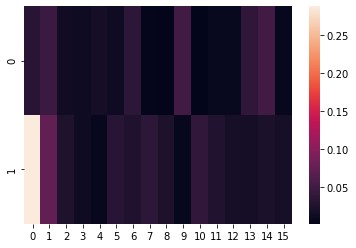

In [61]:
sns.heatmap(gb.feature_importances_.reshape(2, 16))

# 做出预测

In [62]:
e3_data = 

SyntaxError: invalid syntax (<ipython-input-62-2b864c471c12>, line 1)